In [1]:
from pyk4a import PyK4A
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
cam1 = PyK4A(device_id=1)


In [3]:
cam1.start()

In [4]:
cap = cam1.get_capture()

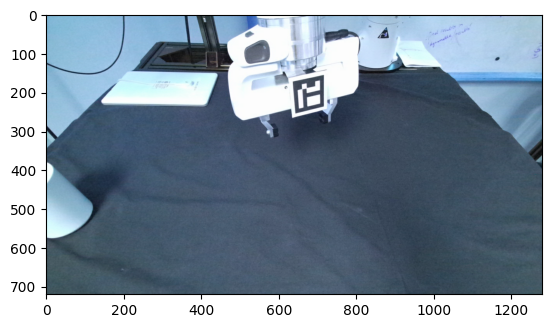

In [5]:
plt.imshow(cap.color)

In [8]:
# Create a point cloud in o3d and show it.
pcd = o3d.geometry.PointCloud()
raw_pc = cap.transformed_depth_point_cloud.astype(np.float32).reshape(-1, 3)
raw_pc = raw_pc / 1000
pcd.points = o3d.utility.Vector3dVector(raw_pc)
# o3d.visualization.draw_geometries([pcd])

# Draw an origin axis.
mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(
    size=0.1, origin=[0, 0, 0])
o3d.visualization.draw_geometries([pcd, mesh_frame])

In [7]:
from scipy.spatial.transform import Rotation as R

In [9]:
pos = [.92481, -0.33611, 0.41669]
quat = [0.66508, 0.64881, -0.26165, -0.26127]

r = R.from_quat(quat).as_matrix()

T = np.eye(4)
T[:3, :3] = r
T[:3, 3] = pos

new_pcd = raw_pc @ T[:3, :3].T + T[:3, 3]

pcd2 = o3d.geometry.PointCloud()
pcd2.points = o3d.utility.Vector3dVector(new_pcd)
o3d.visualization.draw_geometries([pcd2, mesh_frame])




In [10]:
cam1.stop()